Heart Disease Prediction using Logistic Regression Classifier

In [1]:
#Abdul Fattah Ismail 1806200255
#Logistic Regression
#proyek UTS kelompok Rawon 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Source : 
#https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
#https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [2]:
#Read dataset heart.csv
df = pd.read_csv(r'C:\Users\asus\OneDrive\Documents\A.I\heart.csv')

In [3]:
#mencaritahu ukuran dari dataset tersebut, terdapat 303 baris dan 14 kolom
print(df.shape)

(303, 14)


In [4]:
#print 5 data teratas 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#print 5 data terbawah
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#memastikan tidak terdapat nilai NULL dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Visualisasi Data

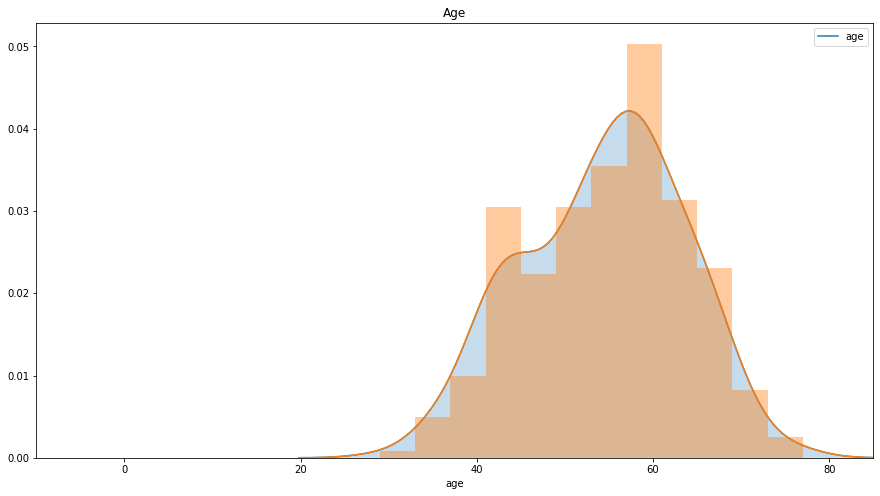

In [30]:
#Melakukan visualisasi "age"
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["age"], shade=True)
sns.distplot(df['age'])

plt.title('Age')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

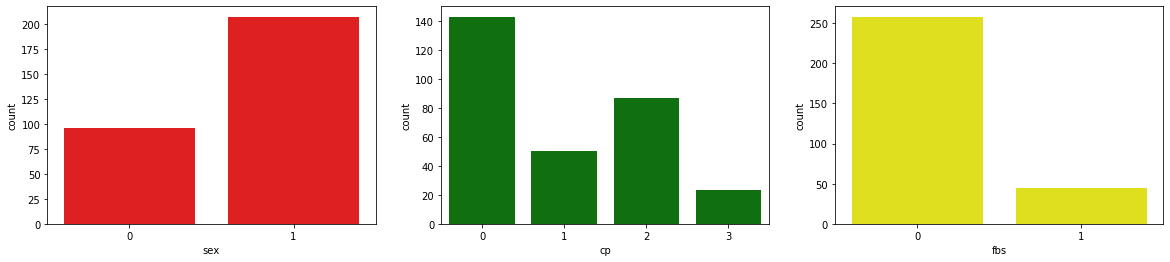

In [9]:
#Melakukan visualisasi untuk plotting pada data "sex","chest pain","fasting blood sugar"
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
sns.countplot(df['sex'], color='red')
f.add_subplot(1,3,2)
sns.countplot(df['cp'], color='green')
f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

[Text(0.5, 0, 'thalach')]

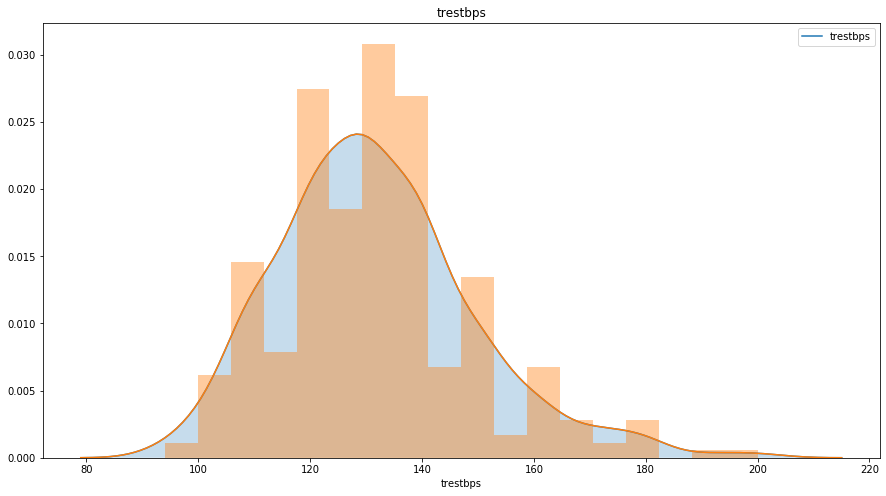

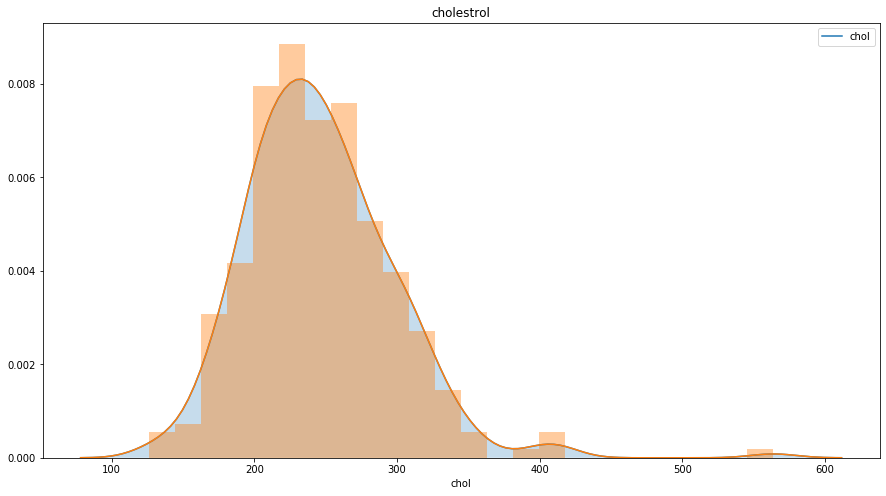

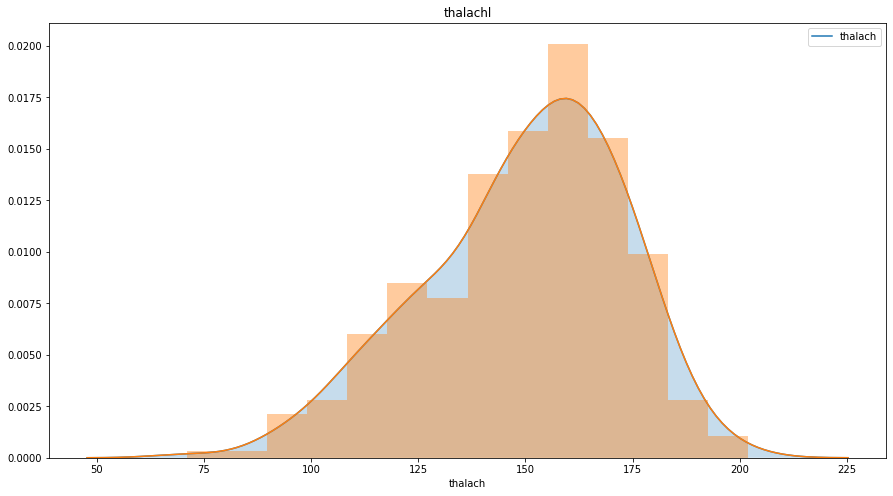

In [32]:
#Melakukan visualisasi untuk plotting data "resting blood pressure"
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["trestbps"], shade=True)
sns.distplot(df['trestbps'])
plt.title('trestbps')
ax.set(xlabel='trestbps')


#Melakukan visualisasi "serum cholesterol"
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["chol"], shade=True)
sns.distplot(df['chol'])
plt.title('cholestrol')
ax.set(xlabel='chol')


#Melakukan visualisasi "max heart rate"
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["thalach"], shade=True)
sns.distplot(df['thalach'])
plt.title('thalachl')
ax.set(xlabel='thalach')


In [11]:
df.corr().style.background_gradient().set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


Machine Learning Model and Accuracy (Logistic Regression)

In [12]:
#membuat variabel x dan y dari fitur diatas
x = df.drop(columns=['target'])
y = df['target']
# membangun model logreg dan menginput fitur yang ada
model = LogisticRegression()
# create the RFE model and select 13 attributes
rfe = RFE(model, 13)
rfe = rfe.fit(x, y)
# print semua fitur 
print('Selected features: %s' % list(x.columns[rfe.support_]))

Selected features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [13]:
#Membagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [14]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(x_test) #predicting the values
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



In [17]:
roc_auc_score(y_test, y_pred)

0.8922222222222222

In [22]:
#List Hyperparameters yang akan diuji
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(solver=solver, penalty=penalty, C=C)

#Membuat Object Logistic Regression
logreg_2 = LogisticRegression()

#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logreg_2, hyperparameters, cv=10)

#Fitting Model
best_model = clf.fit(x,y)

#Nilai hyperparameters terbaik
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Solver: lbfgs
Best Penalty: l2
Best C: 0.08858667904100823


In [19]:
#Prediksi menggunakan model baru
y_pred = best_model.predict(x_test)

#Check performa dari model
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



0.9061111111111111